# Support Vector Machines
Support vector machines are particularly effective at binary classification using both linear and non-linear regression models for small and medium sized datasets. They are particularly well suited for small to medium datasets with many features. They use Large margin classification for linearly seperable data.

using hard margins for SVM can be difficult as it may drive the street to a small size due to outliers. However you can control this by using the "C" hyperparameter. A small "C" value leads to a wider street but more margin violations.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [20]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # 1 if Iris-Virginica 0 otherwise

svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [9]:
svm_clf.predict([[6.6, 1.7]]) #SVM classifiers do not output probabilities for each class only a classification

array([1.])

Alternatively you could use the SGDClassifier(loss="hinge", alpha=1/(m*c)) It does not converge as fast as LinearSVC class but can be usefull to handle huge datasets that do not fit into memory as it uses Stochasic Gradient Descent.

## Nonlinear SVM Classification
many datasets are not at all linearly seperable but you can add PolynomialFeatures transformer to a pipeline. The resultant dataset may be separable.

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

print(X.shape, y.shape)

(100, 2) (100,)


In [11]:
polynomial_svm_clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

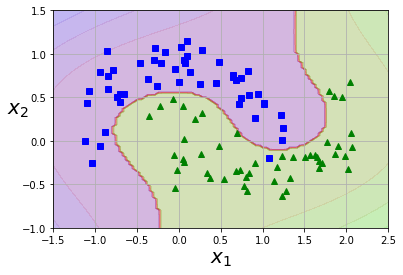

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Features
adding polynomial features e.g. raising the degree of certain features is simple to implement and can work create withall sorts of Machine Learning algorithms but at a low degree SVM cannot deal with ver complex datasets and with high polynomial degree it creates huge number of features.

When using SVM's you can use a very miraculous technique called the kernel trick to get the same result as if you added many polynomial features.

In [13]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

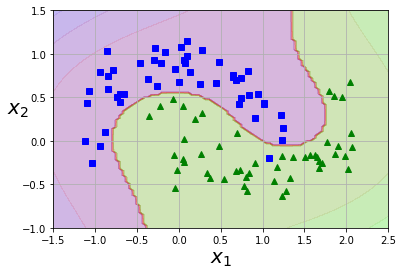

In [14]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

if your model is overfitting you can reduce the degree. coef0 controls how much the model is influenced by high-degree polynomials versus low-degree.

## Adding Similarity Features

A similarity function creates a new feature from an existing. it is a bell shape feature and is computationally expensive however can use a similar kernel method that the polynomial features uses. Guassian RBF kernel creates similar features.

In [15]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])